In [1]:
import numpy as np                  #numpy library for scientific computing tasks
import pandas as pd                 #pandas library for data analysis tasks
import matplotlib.pyplot as plt     #matplotlib library for plotting and visualizations


#Reading in training data
data=pd.read_csv("dataF.csv")
input_mat=data.values

#Declaring global variables
length=16
patterns=input_mat.shape[0]
error=[]

In [2]:
#The ADALINE weight update rule
def weight_update(weight_vec,err_val,input_vec,lr):
    wlen=len(weight_vec)
    change=2.0*lr*err_val
    for i in range(wlen):
        weight_vec[i]+=change*input_vec[i]
    return weight_vec

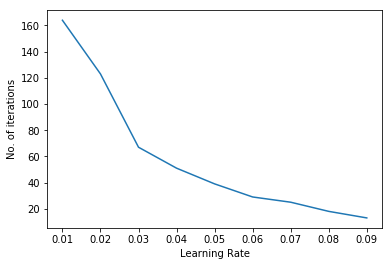

In [3]:
def main():
    weight_vec=np.random.random_sample(16)         #initializing a random weight vector
    choices=np.arange(0.01,0.1,0.01)               #initializing choices for tuning the learning rate
    no_iter=[]
   
    limit=0.01  #Threshold of error after which learning is stopped.
    
    #The following code tries out various learning rates to find the best one.
    for j in range(len(choices)):
        weight_vec=np.random.random_sample(16)
        lr=choices[j]
        flag=True
        iters =0
        bcounter=0
        while(flag):
            iters+=1
            counter=0
            error=[]
            for i in range(patterns):
                input_vec=input_mat[i][0:16]              #extracting input vector from input matrix
                true=input_mat[i][16]                     #extracting true value of input vector
                pred=0
                for i in range(length):
                    pred+=(input_vec[i]*weight_vec[i])
                err_val=true-pred                         #computing error of the prediction
                if(np.absolute(err_val)<limit):           #comparing error against the threshold
                    counter+=1
                error.append(err_val)
                weight_vec=weight_update(weight_vec,err_val,input_vec,lr)  #updating the weight vector suitably
            
            #This loop breaks when counter=no.of patterns, i.e. when for all the patterns, the error is less than 
            #the specified limit. One run of this loop involves calculating the error for each pattern followed 
            #by individual updating of the weights
            
            if(counter==patterns):
                flag = False
        no_iter.append(iters)
        
    #Plotting the graph    
    plt.plot(np.arange(0.01,0.1,0.01),no_iter) 
    plt.xlabel('Learning Rate')
    plt.ylabel('No. of iterations')
         
    return weight_vec          #returns the final updated weight vector
        
weight_vec=main()

In [4]:
#Testing the model on some testing data:
preds=[]
for i in range(patterns):
    input_vec=input_mat[i][0:16]
    pred=0
    for i in range(length):
            pred+=(input_vec[i]*weight_vec[i])          #using the weight vector learned from training
    preds.append(pred)                                  #to generate predictions
print(len(preds))
for i in range(len(preds)):                             #predicts "T" or "J"
    if(preds[i]<0.5):
        print('T')
    else:
        print('J')

8
T
J
T
J
T
J
T
J
